### Classification with CIFAR-10 Dataset and DenseNet network
This script sets up a DenseNet-style network to classify digits from the CIFAR-10 dataset.

In [1]:
import keras
import keras.backend as K
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D, Add, Activation, Dropout, Concatenate
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import numpy as np
from utils import *

/usr/local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = get_cifar10_data(vectorize=False)

Build the model.

In [3]:
def dense_block(x,c,k):
    l = [x]
    for i in range(k):
        if i > 0:
            x = Concatenate()(l)
        x = Conv2D(c,3,padding='same',activation='relu',kernel_initializer='he_normal')(x)
        l.append(x)
    return x

x_in = Input((32,32,3))

x = Conv2D(32,3,padding='same',activation='relu',kernel_initializer='he_normal')(x_in)

x = dense_block(x,32,6)
x = Conv2D(16,1,activation='relu',kernel_initializer='he_normal')(x)
x = MaxPooling2D(2,2)(x)

x = dense_block(x,32,12)
x = Conv2D(16,1,activation='relu',kernel_initializer='he_normal')(x)
x = MaxPooling2D(2,2)(x)

x = Flatten()(x)
x = Dense(200,kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)
x = Dense(1,activation='sigmoid',kernel_initializer='he_normal')(x)
model = Model(inputs=x_in,outputs=x)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 32, 32, 64)   0           conv2d_1[0][0]                   
                                                                 conv2d_2[0][0]                   
__________

Set up the model to optimize the categorical crossentropy loss using stochastic gradient descent.

In [4]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Optimize the model over the training data.

In [5]:
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 15s 2ms/step - loss: 0.4342 - acc: 0.7978 - val_loss: 0.2887 - val_acc: 0.8740
Epoch 2/50
9000/9000 [==============================] - 11s 1ms/step - loss: 0.2638 - acc: 0.8890 - val_loss: 0.2345 - val_acc: 0.9000
Epoch 3/50
9000/9000 [==============================] - 11s 1ms/step - loss: 0.1922 - acc: 0.9238 - val_loss: 0.1594 - val_acc: 0.9310
Epoch 4/50
9000/9000 [==============================] - 11s 1ms/step - loss: 0.1459 - acc: 0.9410 - val_loss: 0.1451 - val_acc: 0.9390
Epoch 5/50
9000/9000 [==============================] - 11s 1ms/step - loss: 0.1218 - acc: 0.9538 - val_loss: 0.1282 - val_acc: 0.9470
Epoch 6/50
9000/9000 [==============================] - 11s 1ms/step - loss: 0.0965 - acc: 0.9618 - val_loss: 0.1272 - val_acc: 0.9510
Epoch 7/50
9000/9000 [==============================] - 11s 1ms/step - loss: 0.0861 - acc: 0.9672 - val_loss: 0.0853 - val_acc: 0.9680
Epoch 8

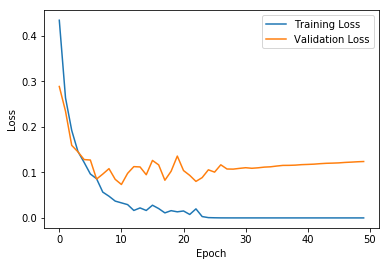

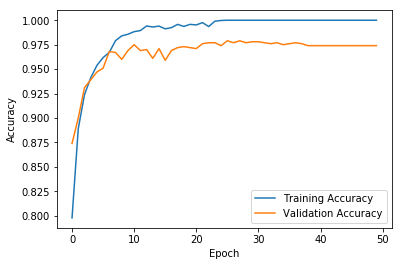

In [6]:
plot_history(history)

In [7]:
evaluate_test_accuracy(model,x_test,y_test)

2000/2000 [==============================] - 1s 487us/step
Test accuracy: 97.40%
